<a href="https://colab.research.google.com/github/CJEGGERT/IS_4487_Tokyo/blob/main/chris_eggert_day3_corrected_lab_retailer_intro2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 3 Lab, IS 4487

Outline

Repeat exercises from Lab 2, for practice, but with the *SuperStore Retail Orders* dataset

- Loading installed packages
- Inspect data
- Clean data
- Summarize data
- Explore plot types and search for insights

Please use the Gemini AI tool to get coding ideas.



# Notebook Instructions
- Remember to save a copy of the notebook in Drive so that you can save your changes.
- Complete the Assignment Tasks.
- When you are done revising this notebook save your changes to GitHub and upload the URL for the file to Canvas for the assignment.
- Some of these assignments ask you to do things we have not covered yet.  Use AI to come up with a solution.

# Load Libraries

➡️ Assignment Tasks
- Load Pandas

In [2]:
# your code goes here
import pandas as pd


# Load Data

In [3]:
ss = pd.read_csv("https://raw.githubusercontent.com/jefftwebb/is_4487_base/main/Labs/DataSets/superstore_retail_orders.csv")

# Summarize and Review Data

➡️ Assignment Tasks

- Describe or profile the dataframe

In [29]:
# Your code goes here
ss.describe()

,order_id,order_date,quantity,product_price,total_purchase
count,54118.000000,54118,54118.000000,54118.000000,5.411800e+04
mean,61649.712868,2021-11-11 22:22:16.013895424,1.553106,614.235121,7.975317e+02
min,45079.000000,1922-06-28 00:00:00,1.000000,2.290000,2.290000e+00
25%,55640.000000,2021-10-06 00:00:00,1.000000,7.950000,1.497000e+01
50%,61869.500000,2022-01-10 00:00:00,1.000000,475.600000,4.756000e+02
75%,68067.000000,2022-04-11 00:00:00,2.000000,914.620000,1.000440e+03
max,74147.000000,2029-08-02 00:00:00,2000.000000,3578.270000,2.024994e+06
std,7518.908459,NaN,9.289632,816.864795,1.413424e+04


In [37]:
ss.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price,total_purchase
0,51188,2021-07-01,2021-07,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,1949.97
1,51187,2021-07-01,2021-07,Isaac Allen,Traceyland,WEST VIRGINIA,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,2599.96
2,51199,2021-07-02,2021-07,Ian Morgan,Dylanberg,SOUTH DAKOTA,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,3249.95
3,51241,2021-07-04,2021-07,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,649.99
4,51297,2021-07-08,2021-07,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,649.99


In [36]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54118 entries, 0 to 56044
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          54118 non-null  int64         
 1   order_date        54118 non-null  datetime64[ns]
 2   order_year_month  54118 non-null  period[M]     
 3   customer_name     54118 non-null  object        
 4   city              54118 non-null  object        
 5   state_province    54118 non-null  object        
 6   quantity          54118 non-null  float64       
 7   product_name      54118 non-null  object        
 8   product_line      54118 non-null  object        
 9   product_price     54118 non-null  float64       
 10  total_purchase    54118 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5), period[M](1)
memory usage: 7.0+ MB


# Prepare Data

➡️ Assignment Tasks
- Remove rows with empty (NULL) values
- Locate outliers in any of the variables.   Filter them out if they appear to be mistakes; keep them if they are exceptional cases.
- Create a new field: total_purchase. This should be product_price x quantity.

In [38]:
# Drop NAs
ss = ss.dropna()

In [20]:
# Search for and filter outliers
ss=ss[ss.quantity < 5000]

ss=ss[ss.product_price < 10000]




In [19]:
# create total_purchase
ss['total_purchase'] = ss['product_price'] * ss['quantity']

Check that your cleaning worked

In [18]:
# your code goes here
ss.describe()

,order_id,order_date,quantity,product_price,total_purchase
count,54118.000000,54118,54118.000000,54118.000000,5.411800e+04
mean,61649.712868,2021-11-11 22:22:16.013895424,1.553106,614.235121,7.975317e+02
min,45079.000000,1922-06-28 00:00:00,1.000000,2.290000,2.290000e+00
25%,55640.000000,2021-10-06 00:00:00,1.000000,7.950000,1.497000e+01
50%,61869.500000,2022-01-10 00:00:00,1.000000,475.600000,4.756000e+02
75%,68067.000000,2022-04-11 00:00:00,2.000000,914.620000,1.000440e+03
max,74147.000000,2029-08-02 00:00:00,2000.000000,3578.270000,2.024994e+06
std,7518.908459,NaN,9.289632,816.864795,1.413424e+04


# Summarize Data

➡️ Assignment Tasks
- Calculate the average price per year-month
- Calculate the total revenue per year month

Does more cleaning need to be done? If so, do it and then recreate the above summary tables.

In [39]:
# average price

ss['order_date'] = pd.to_datetime(ss['order_date'], errors='coerce')


ss_filtered = ss[(ss['order_date'].dt.year >= 2020) & (ss['order_date'].dt.year <= 2022)]



ss_filtered['order_year_month'] = ss['order_date'].dt.to_period('M')
ss_filtered.groupby(['order_year_month'])['product_price'].mean()

<ipython-input-39-1c092f9e5236>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss_filtered['order_year_month'] = ss['order_date'].dt.to_period('M')


order_year_month
2020-01    3172.420978
2020-02    3199.469359
2020-03    3242.035279
2020-04    3194.646275
2020-05    3192.571359
2020-06    3132.275911
2020-07    1959.974251
2020-08    1924.981087
2020-09    1764.130833
2020-10    1800.830762
2020-11    1666.368901
2020-12    1729.697795
2021-01    1774.621612
2021-02    1755.272269
2021-03    1760.495962
2021-04    1691.161107
2021-05    1640.100368
2021-06    1694.477581
2021-07     729.851550
2021-08     409.107649
2021-09     437.462140
2021-10     434.127245
2021-11     468.310875
2021-12     500.330821
2022-01     469.658801
2022-02     481.718170
2022-03     485.362163
2022-04     482.481023
2022-05     513.701953
2022-06     509.168107
Freq: M, Name: product_price, dtype: float64

In [40]:
# total revenue
ss_filtered['order_year_month'] = ss['order_date'].dt.to_period('M')
ss_filtered.groupby(['order_year_month'])['total_purchase'].mean()

<ipython-input-40-eb88f10d38b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss_filtered['order_year_month'] = ss['order_date'].dt.to_period('M')


order_year_month
2020-01    25788.858315
2020-02     3199.469359
2020-03     3587.147614
2020-04     3194.646275
2020-05     3192.571359
2020-06     3132.275911
2020-07     1959.974251
2020-08     1924.981087
2020-09     1764.130833
2020-10     1800.830762
2020-11     1666.368901
2020-12     1729.697795
2021-01     1774.621612
2021-02     1755.272269
2021-03     1760.495962
2021-04     1691.161107
2021-05     1640.100368
2021-06     1694.477581
2021-07      787.698376
2021-08      497.058974
2021-09      521.074585
2021-10      513.792344
2021-11      547.528252
2021-12      578.963471
2022-01      551.838281
2022-02      556.058111
2022-03      956.717746
2022-04      555.947491
2022-05      587.997629
2022-06      582.438453
Freq: M, Name: total_purchase, dtype: float64

# Plot Data

➡️ Assignment Tasks
- Produce two plots that show patterns or relationships in the data.
- Interpret these patterns for potential value to the business.  

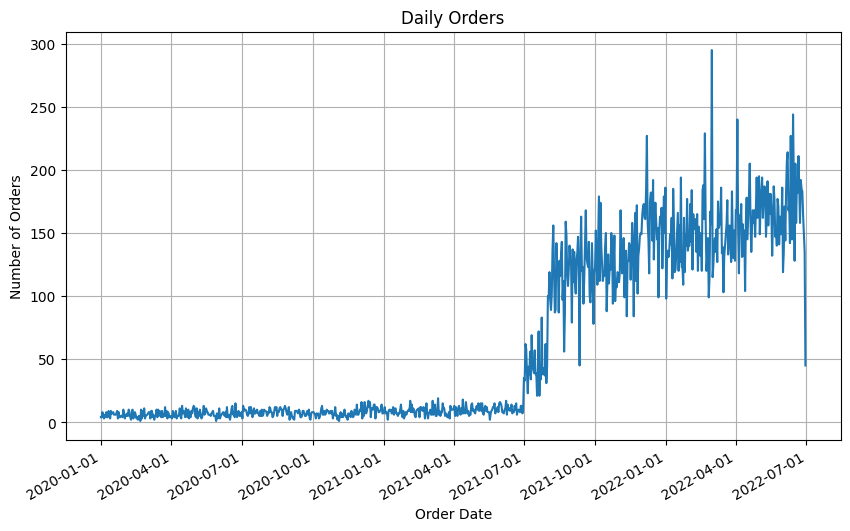

In [35]:
# Your code goes here.  Plot 1
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


daily_orders = ss_filtered.groupby('order_date')['order_id'].count()


ax = daily_orders.plot(kind='line', figsize=(10, 6), title='Daily Orders',
                       xlabel='Order Date', ylabel='Number of Orders', grid=True)


date_fmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_fmt)



<ipython-input-34-d9e14e639689>:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


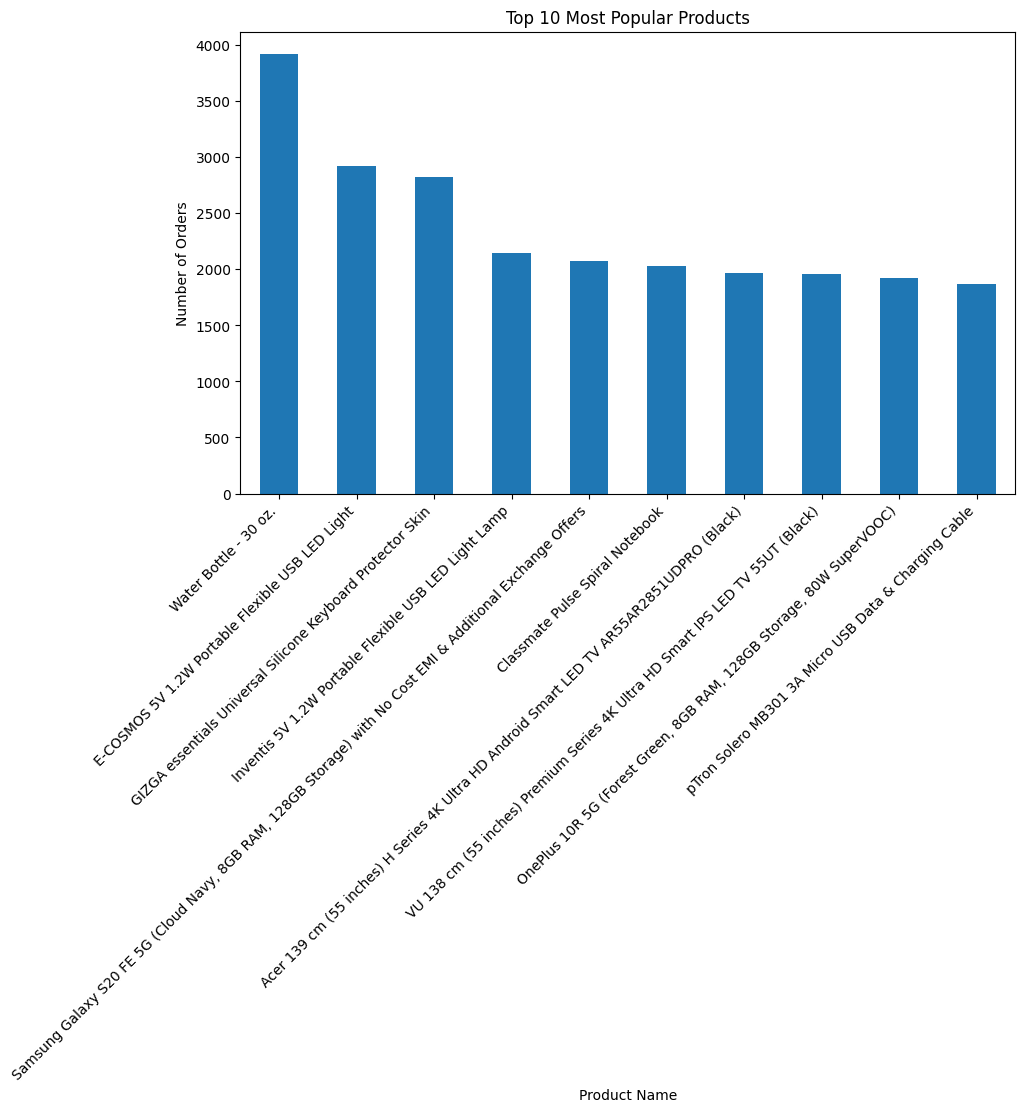

In [34]:
# Your code goes here.  Plot 2
import matplotlib.pyplot as plt




top_products = ss_filtered.groupby('product_name')['order_id'].count().nlargest(10)


top_products.plot(kind='bar', figsize=(10, 6), title='Top 10 Most Popular Products',
                  xlabel='Product Name', ylabel='Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


Make an interpretive comment.

It seems that we had a big dip in daily sales recently, but overall they have gone up over time.

It also seems that our most popular product is the 30 oz. water bottle by far. We should continue selling this product.